# Cassandra Setup and Data Visualization

### Imports

In [24]:
from cassandra.cluster import Cluster
import matplotlib.pyplot as plt
import matplotlib.dates
import pandas as pd

### Section 1: Cassandra Setup

In [3]:
cluster = Cluster(['0.0.0.0'],port=9042)
session = cluster.connect()
session.execute("CREATE KEYSPACE IF NOT EXISTS saCity WITH REPLICATION = { 'class' : 'SimpleStrategy', 'replication_factor' : 1 };")
session.execute('USE sacity')
session.execute('create table senCity (windowstart timestamp, windowend timestamp, key_str text, sentiment float, primary key (windowstart, key_str))')

### Section 2: Data Visualization

In [20]:
rows = session.execute("Select * from senCity")
df = pd.DataFrame(rows)

print(df.describe(),"\n",df)
#print(df)

       sentiment
count   8.000000
mean    0.002897
std     0.141696
min    -0.250000
25%    -0.031111
50%     0.008333
75%     0.064881
max     0.183333 
           windowstart key_str  sentiment           windowend
0 2022-10-30 15:58:10     CHI   0.166667 2022-10-30 15:58:15
1 2022-10-30 15:58:10     LON   0.016667 2022-10-30 15:58:15
2 2022-10-30 15:58:25     LON   0.000000 2022-10-30 15:58:30
3 2022-10-30 15:58:20     CHI   0.000000 2022-10-30 15:58:25
4 2022-10-30 15:58:20     LON   0.030952 2022-10-30 15:58:25
5 2022-10-30 15:58:15     CHI  -0.250000 2022-10-30 15:58:20
6 2022-10-30 15:58:15     LON  -0.124444 2022-10-30 15:58:20
7 2022-10-30 15:58:05     LON   0.183333 2022-10-30 15:58:10


In [45]:
for i,data in df.groupby("key_str"):
    print(i,data)

CHI           windowstart key_str  sentiment           windowend
0 2022-10-30 15:58:10     CHI   0.166667 2022-10-30 15:58:15
3 2022-10-30 15:58:20     CHI   0.000000 2022-10-30 15:58:25
5 2022-10-30 15:58:15     CHI  -0.250000 2022-10-30 15:58:20
LON           windowstart key_str  sentiment           windowend
1 2022-10-30 15:58:10     LON   0.016667 2022-10-30 15:58:15
2 2022-10-30 15:58:25     LON   0.000000 2022-10-30 15:58:30
4 2022-10-30 15:58:20     LON   0.030952 2022-10-30 15:58:25
6 2022-10-30 15:58:15     LON  -0.124444 2022-10-30 15:58:20
7 2022-10-30 15:58:05     LON   0.183333 2022-10-30 15:58:10


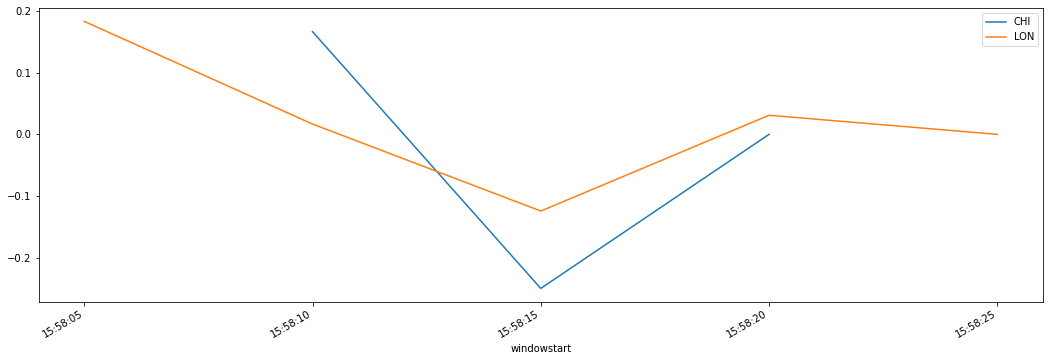

In [49]:

fig, ax = plt.subplots(figsize=(18,6))

for name, group in df.groupby('key_str'):
    group.plot(x='windowstart', y='sentiment', ax=ax, label=name)

plt.show()
